# K-Nearest Neighbour


K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). A new record is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function. If K = 1, then the case is simply assigned to the class of its nearest neighbor. 

Suppose you want to find out the class of the blue star (BS) in the image below. BS can either be RC or GS. The “K” is KNN algorithm is the nearest neighbor we wish to take the vote from. Let’s say K = 3. Hence, we will now make a circle with BS as the center just as big as to enclose only three datapoints on the plane. The three closest points to BS is all RC. Hence, with a good confidence level, we can say that the BS should belong to the class RC. Here, the choice became very obvious as all three votes from the closest neighbor went to RC. The choice of the parameter K is very crucial in this algorithm.

<img src="img1.png">

The distance functions used for Numeric fields are given below:
<img src="img2.png">

### Libraries useful in K-NN are listed below

### Get The Data. Load data "bank-data.csv"

In [1]:
# import dataset
import pandas as pd
df = pd.read_csv('bank-data.csv',index_col=0)
df.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
id,,,,,,,,,,,
ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [2]:
# import library for preprocessing
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [3]:
# Tranform data using "fit_transform(attribute)" function  
#df['sex','married','car','save_act','current_act','mortgage','pep']=le.fit_transform(df['sex','married','car','save_act','current_act','mortgage','pep'])
df.sex=le.fit_transform(df.sex)
df.married=le.fit_transform(df.married)
df.car=le.fit_transform(df.car)
df.save_act=le.fit_transform(df.save_act)
df.current_act=le.fit_transform(df.current_act)
df.mortgage=le.fit_transform(df.mortgage)
df.pep=le.fit_transform(df.pep)
df


,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
id,,,,,,,,,,,
ID12101,48,0,INNER_CITY,17546.0,0,1,0,0,0,0,1
ID12102,40,1,TOWN,30085.1,1,3,1,0,1,1,0
ID12103,51,0,INNER_CITY,16575.4,1,0,1,1,1,0,0
ID12104,23,0,TOWN,20375.4,1,3,0,0,1,0,0
ID12105,57,0,RURAL,50576.3,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
ID12575,31,0,TOWN,22678.1,0,1,1,1,1,1,1
ID12576,33,0,TOWN,12178.5,1,2,0,1,1,1,0
ID12577,43,1,RURAL,26106.7,0,1,0,0,1,0,1


In [4]:
# Convert "Region" into presence absence attribute
df = pd.concat([df,pd.get_dummies(df['region'], prefix='REG')],axis=1)
df.drop(['region'],axis=1, inplace=True)

In [5]:
# display dataframe first 5 columns
df.head()

,age,sex,income,married,children,car,save_act,current_act,mortgage,pep,REG_INNER_CITY,REG_RURAL,REG_SUBURBAN,REG_TOWN
id,,,,,,,,,,,,,,
ID12101,48,0,17546.0,0,1,0,0,0,0,1,1,0,0,0
ID12102,40,1,30085.1,1,3,1,0,1,1,0,0,0,0,1
ID12103,51,0,16575.4,1,0,1,1,1,0,0,1,0,0,0
ID12104,23,0,20375.4,1,3,0,0,1,0,0,0,0,0,1
ID12105,57,0,50576.3,1,0,0,1,0,0,0,0,1,0,0


### Train and Test Split

In [6]:
# Select the independent variables and the target attribute
X = df.iloc[:,[0,1,2,3,4,5,6,7,8,10,11,12,13]]  # Selecting the independent variables
Y=df[df.columns[9]] # selecting only the target lableled column

#### Obtain X_train, X_test, Y_train, Y_test by splitting the dataset into 70-30 ratio with a random state value 30.

Note: random_state is used to control the shuffling in the split of the dataset.

This method is called the Hold Out Method.

In [7]:
# Divide the dataset into training and testing partition
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state = 30)

### Import the k-NN Classifier library

In [8]:
# import KNeighborsClassifier library
from sklearn.neighbors import KNeighborsClassifier

### Train 3-NN by using euclidean distance as distance measure

In [9]:
# Apply the classifier
knn=KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

### Prediction and Evaluation

In [10]:
# import required libraries
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score

In [11]:
# predictions for testing partition
predictions = knn.predict(X_test)

In [12]:
# Calculate and print confusion matrix and other performance measures (Refer previous labsheet)
print(classification_report(Y_test,predictions))
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions))
print("\n Accuracy")
print(accuracy_score(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.55      0.60      0.57        80
           1       0.44      0.39      0.41        64

    accuracy                           0.51       144
   macro avg       0.50      0.50      0.49       144
weighted avg       0.50      0.51      0.50       144

Confusion Matrix
[[48 32]
 [39 25]]

 Accuracy
0.5069444444444444


###  k(5) - fold method for training and testing split and check the difference in performance of 3-NN 

In [13]:
# Import required library for K-fold and test the performance of model using Eucledean distance
from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')
scores = cross_val_score(knn_cv, X, Y, cv=5, scoring='accuracy')
print('scores: ', scores)
print('mean score: ', scores.mean())

scores:  [0.52083333 0.55208333 0.5625     0.58333333 0.55789474]
mean score:  0.5553289473684211


#### Q1: Normalize (min-max normalization) age,income and children columns of the dataset and apply 3-NN using both euclidean and manhattan distance

In [14]:
#min-max normalization
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=pd.DataFrame(X)
X_scaled[['age','income','children']] =scaler.fit_transform(X_scaled[['age','income','children']])
#X_scaled.income =scaler.fit_transform(X_scaled.income)
#X_scaled.children =scaler.fit_transform(X_scaled.children)
Xn=pd.DataFrame(X_scaled)
Xn

,age,sex,income,married,children,car,save_act,current_act,mortgage,REG_INNER_CITY,REG_RURAL,REG_SUBURBAN,REG_TOWN
id,,,,,,,,,,,,,
ID12101,0.612245,0,0.215634,0,0.333333,0,0,0,0,1,0,0,0
ID12102,0.448980,1,0.431395,1,1.000000,1,0,1,1,0,0,0,1
ID12103,0.673469,0,0.198933,1,0.000000,1,1,1,0,1,0,0,0
ID12104,0.102041,0,0.264320,1,1.000000,0,0,1,0,0,0,0,1
ID12105,0.795918,0,0.783987,1,0.000000,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID12575,0.265306,0,0.303943,0,0.333333,1,1,1,1,0,0,0,1
ID12576,0.306122,0,0.123276,1,0.666667,0,1,1,1,0,0,0,1
ID12577,0.510204,1,0.362938,0,0.333333,0,0,1,0,0,1,0,0


In [15]:
# Select the independent variables and the target attribute
X_train, X_test, Y_train, Y_test = train_test_split(Xn, Y, test_size=0.30, random_state = 30)

In [16]:
# KNN using euclidean distance
knn_cv_1_e = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')
scores_1_e = cross_val_score(knn_cv_1_e, Xn, Y, cv=5, scoring='accuracy')
print('Euclidean scores: ', scores_1_e)
print('mean score for Euclidean after normalization: ', scores_1_e.mean())

Euclidean scores:  [0.60416667 0.625      0.59375    0.59375    0.56842105]
mean score for Euclidean after normalization:  0.5970175438596491


In [17]:
# KNN using manhattan distance
knn_cv_1_m = KNeighborsClassifier(n_neighbors=3, metric = 'manhattan')
scores_1_m = cross_val_score(knn_cv_1_m, Xn, Y, cv=5, scoring='accuracy')
print('Manhattan scores: ', scores_1_m)
print('mean score for Manhattan after normalization: ', scores_1_m.mean())

Manhattan scores:  [0.66666667 0.70833333 0.66666667 0.65625    0.61052632]
mean score for Manhattan after normalization:  0.661688596491228


#### Q2: Write your observation regarding change in the perfromance of KNN

Performance increased with normalization. Manhattan better than Euclidean

#### Q3: Find the accuracy of 1-NN model

In [19]:
# Use euclidean distance
knn_cv_3_e = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')
scores_3_e = cross_val_score(knn_cv_3_e, Xn, Y, cv=5, scoring='accuracy')
print('Euclidean scores: ', scores_3_e)
print('mean score for Euclidean after normalization fro 1NN: ', scores_3_e.mean())

Euclidean scores:  [0.625      0.70833333 0.59375    0.63541667 0.63157895]
mean score for Euclidean after normalization fro 1NN:  0.6388157894736842


#### Q4: Implement the weighted k-NN model. Use k-fold method for train-test split

In [22]:
# Refer labsheet 4
knn_cv_4_e = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean',weights='distance')
scores_4_e = cross_val_score(knn_cv_4_e, Xn, Y, cv=5, scoring='accuracy')
print('Euclidean scores: ', scores_4_e)
print('mean score for Euclidean after normalization:', scores_4_e.mean())

Euclidean scores:  [0.61458333 0.67708333 0.63541667 0.625      0.57894737]
mean score for Euclidean after normalization: 0.6262061403508772


#### Q5: What is the best k value in this model

In [23]:
# Refer labsheet 4
scorelist_5=[]
k_val_5=[]
for k in range(1,21):
    knn_cv_5 = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    scores_5 = cross_val_score(knn_cv_5, Xn, Y, cv=5, scoring='accuracy')
    print(str(k)+'-NN Euclidean scores: ', scores_5)
    print(str(k)+'-NN mean score for Euclidean: ', scores_5.mean())
    scorelist_5.append(scores_5.mean())
    k_val_5.append(k)

1-NN Euclidean scores:  [0.625      0.70833333 0.59375    0.63541667 0.63157895]
1-NN mean score for Euclidean:  0.6388157894736842
2-NN Euclidean scores:  [0.63541667 0.64583333 0.64583333 0.63541667 0.63157895]
2-NN mean score for Euclidean:  0.6388157894736842
3-NN Euclidean scores:  [0.60416667 0.625      0.59375    0.59375    0.56842105]
3-NN mean score for Euclidean:  0.5970175438596491
4-NN Euclidean scores:  [0.63541667 0.59375    0.60416667 0.625      0.62105263]
4-NN mean score for Euclidean:  0.6158771929824561
5-NN Euclidean scores:  [0.60416667 0.59375    0.63541667 0.64583333 0.56842105]
5-NN mean score for Euclidean:  0.6095175438596491
6-NN Euclidean scores:  [0.5625     0.63541667 0.66666667 0.65625    0.58947368]
6-NN mean score for Euclidean:  0.6220614035087719
7-NN Euclidean scores:  [0.57291667 0.64583333 0.64583333 0.67708333 0.57894737]
7-NN mean score for Euclidean:  0.624122807017544
8-NN Euclidean scores:  [0.60416667 0.67708333 0.60416667 0.625      0.6     

Max Accuracy using Euclidean: 0.6514035087719298
K value: 20


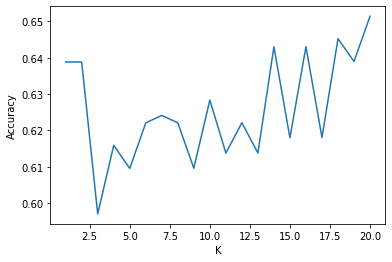

In [24]:
# Refer labsheet 4
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_val_5,scorelist_5)
max_idx=scorelist_5.index(max(scorelist_5))
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Max Accuracy using Euclidean:",scorelist_5[max_idx])
print("K value:",k_val_5[max_idx])

In [ ]:
# Refer labsheet 4

#### Q6: Consider "current_act" as an irrelevant attribute. Remove it and find the accuracy of KNN classifier

In [55]:
# Select the independent variables and the target attribute after dropping specified column
X_train.drop(columns=['current_act'])
X_test.drop(columns=['current_act'])
X_test

,age,sex,income,married,children,car,save_act,current_act,mortgage,REG_INNER_CITY,REG_RURAL,REG_SUBURBAN,REG_TOWN
id,,,,,,,,,,,,,
ID12350,0.367347,1,0.280785,1,1.000000,1,0,1,0,0,0,0,1
ID12201,0.734694,1,0.373283,1,0.333333,0,1,1,1,1,0,0,0
ID12229,0.469388,1,0.156214,1,1.000000,1,1,1,0,0,0,0,1
ID12127,0.551020,1,0.271793,1,0.000000,0,1,1,1,1,0,0,0
ID12318,0.448980,0,0.460457,1,1.000000,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID12279,0.510204,1,0.176210,1,0.000000,0,0,0,0,1,0,0,0
ID12467,0.836735,0,0.427640,0,0.333333,1,0,1,0,1,0,0,0
ID12113,0.530612,0,0.184486,1,0.333333,0,1,1,1,0,0,0,1


In [59]:
# Use euclidean distance as distance metric and k(5) -fold method of test train
knn_cv_6_e = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')
scores_6_e = cross_val_score(knn_cv_6_e, Xn.loc[:, Xn.columns != 'current_act'], Y, cv=5, scoring='accuracy')
print('Euclidean scores: ', scores_6_e)
print('mean score for Euclidean after removing current_act: ', scores_6_e.mean())

Euclidean scores:  [0.57291667 0.625      0.69791667 0.6875     0.58947368]
mean score for Euclidean after removing current_act:  0.6345614035087719


#### Q7: Write your observation

The accuracy improves on removal on irrevelant attribute